In [1]:
import pandas as pd

df_tt1 = pd.read_csv("term-test-1-result.csv")
df_tt2 = pd.read_csv("term-test-2-result.csv")

In [2]:
df_merged = pd.merge(df_tt1, df_tt2, on=['Registration Number', 'Name'])

print(df_merged.head())

   Registration Number                    Name  TT-1 Marks  TT-2 Marks
0             20165001             Ummey Honey          15           5
1             20165002  Tangimul Hoque Bhuiyan          17          15
2             20165003      Syed Kinkel Uddin            8           6
3             20165004              Radia Khan          18           8
4             20165005           Abida sultana           6           8


In [3]:

df_merged['Best Marks'] = df_merged[['TT-1 Marks', 'TT-2 Marks']].max(axis=1)

df_merged['Average Marks'] = df_merged[['TT-1 Marks', 'TT-2 Marks']].mean(axis=1)
print(df_merged.head())

   Registration Number                    Name  TT-1 Marks  TT-2 Marks  \
0             20165001             Ummey Honey          15           5   
1             20165002  Tangimul Hoque Bhuiyan          17          15   
2             20165003      Syed Kinkel Uddin            8           6   
3             20165004              Radia Khan          18           8   
4             20165005           Abida sultana           6           8   

   Best Marks  Average Marks  
0          15           10.0  
1          17           16.0  
2           8            7.0  
3          18           13.0  
4           8            7.0  


In [4]:
df_merged.drop(columns=['TT-1 Marks', 'TT-2 Marks'], inplace=True)
print(df_merged.head())

   Registration Number                    Name  Best Marks  Average Marks
0             20165001             Ummey Honey          15           10.0
1             20165002  Tangimul Hoque Bhuiyan          17           16.0
2             20165003      Syed Kinkel Uddin            8            7.0
3             20165004              Radia Khan          18           13.0
4             20165005           Abida sultana           8            7.0


In [6]:
df_attendance = pd.read_csv("attendance-term-final.csv")

df_final = pd.merge(df_merged, df_attendance, on=['Registration Number', 'Name'])

df_final['Final Marks'] = df_final['Term Final Marks'] * 0.7 + df_final['Average Marks'] + df_final['Attendance Marks']

print(df_final.head())

   Registration Number                    Name  Best Marks  Average Marks  \
0             20165001             Ummey Honey          15           10.0   
1             20165002  Tangimul Hoque Bhuiyan          17           16.0   
2             20165003      Syed Kinkel Uddin            8            7.0   
3             20165004              Radia Khan          18           13.0   
4             20165005           Abida sultana           8            7.0   

   Attendance Marks  Term Final Marks  Final Marks  
0                 9                76         72.2  
1                 8                43         54.1  
2                 5                71         61.7  
3                10                43         53.1  
4                 9                77         69.9  


In [7]:
df_final.to_csv("final result.csv", index=False)

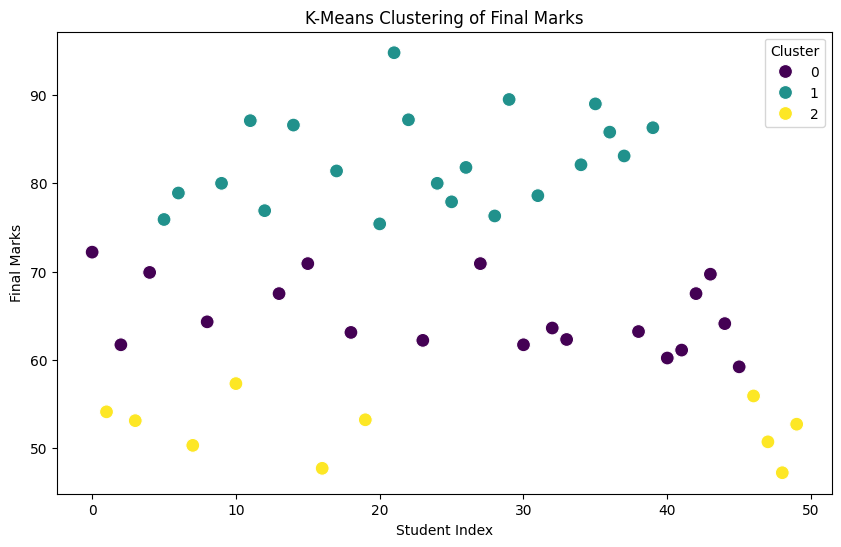

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

X = df_final[['Final Marks']]

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_final['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_final.index, y=df_final['Final Marks'], hue=df_final['Cluster'], palette='viridis', s=100)
plt.xlabel("Student Index")
plt.ylabel("Final Marks")
plt.title("K-Means Clustering of Final Marks")
plt.legend(title="Cluster")
plt.show()
